In [ ]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 2000
lambda_               = 1e-5
# Hyperparameters from part c, d e and f:
learning_rate = 0.01
n_iterations  = 2000
tolerance     = 1e-10
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.9
epsilon       = 1e-8
lambda_       = 0.001
batch_size    = 32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

#We create the data
train, test, full = make_data(number_of_data_points, seed)

# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

# Making design matrices based of the scaled and split data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test,  polynomial_degree, intercept=True)

In [ ]:
# OLS regression : 
# OLS analytical solution
theta_ols  = OLS_parameters(X_train, y_train)
y_pred_ols = X_test @ theta_ols
mse_ols    = MSE(y_test, y_pred_ols)
r2_ols     = R2(y_test, y_pred_ols)
# Gradient descent solution
theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ols = X_test @ theta_gd_ols
mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
r2_gd_ols     = R2(y_test, y_pred_gd_ols)
# Print results
print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")
print()
# RIDGE regression : 
# Analytical solution
beta_ridge   = Ridge_parameters(X_train, y_train, lambda_)
y_pred_ridge = X_test @ beta_ridge
mse_ridge    = MSE(y_test, y_pred_ridge)
r2_ridge     = R2(y_test, y_pred_ridge)
# Gradient descent solution
beta_gd_ridge, cost_history_ridge = gradient_descent_ridge(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ridge = X_test @ beta_gd_ridge
mse_gd_ridge    = MSE(y_test, y_pred_gd_ridge)
r2_gd_ridge     = R2(y_test, y_pred_gd_ridge)
# Print results
print(f"Ridge Analytical Solution: MSE = {mse_ridge:.6f}, R2 = {r2_ridge:.6f}")
print(f"Ridge Gradient Descent:    MSE = {mse_gd_ridge:.6f}, R2 = {r2_gd_ridge:.6f}")
# Gradient descent solution for Lasso
beta_gd_lasso, cost_history_lasso = gradient_descent_lasso(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_lasso = X_test @ beta_gd_lasso
mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)
# Print results
print(f"Lasso Gradient Descent:    MSE = {mse_gd_lasso:.6f}, R2 = {r2_gd_lasso:.6f}")

In [59]:
theta_lasso_gd, lasso_cost_hist = gradient_descent_lasso(X_train_,y_train,0.1,n_iterations = 100000)
theta2_lasso_gd, lasso2_cost_hist = gradient_descent_lasso(X_train_,y_train,0.1,n_iterations = 100000)


In [60]:
y_pred_gd_lasso = X_test @ theta_lasso_gd
mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)

Text(0.5, 1.0, 'LASSO ')

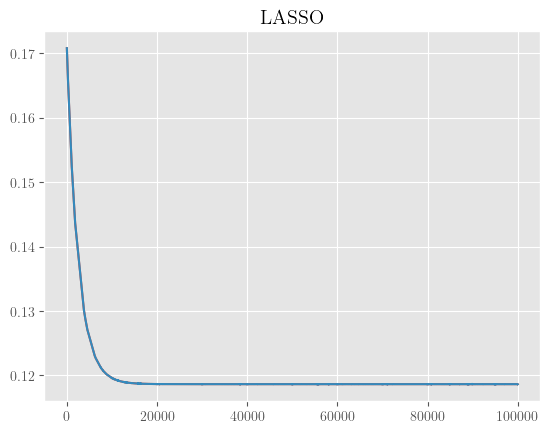

In [61]:
plt.plot(lasso_cost_hist)
plt.plot(lasso_cost_hist)
plt.title("LASSO ")

In [62]:
epochs = 1000
lmbd = 0.1
lr = 0.05

sdg_ols, cost_ols = stochastic_gradient_descent_advanced(X_train_, y_train, method='gd', lr_method='ols', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_ridge, cost_ridge = stochastic_gradient_descent_advanced(X_train_, y_train, method='gd', lr_method='ridge', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_lasso, cost_lasso = stochastic_gradient_descent_advanced(X_train_, y_train, method='gd', lr_method='lasso', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_ols_adam, cost_ols_adam = stochastic_gradient_descent_advanced(X_train_, y_train, method='adam', lr_method='ols', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_ridge_adam, cost_ridge_adam = stochastic_gradient_descent_advanced(X_train_, y_train, method='adam', lr_method='ridge', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_lasso_adam, cost_lasso_adam = stochastic_gradient_descent_advanced(X_train_, y_train, method='adam', lr_method='lasso', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)

IndexError: list index out of range

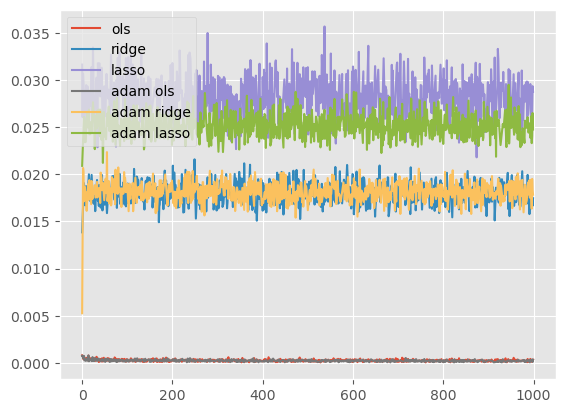

In [ ]:
plt.plot(cost_ols, label = "ols")
plt.plot(cost_ridge, label = "ridge")
plt.plot(cost_lasso, label = "lasso")
plt.plot(cost_ols_adam, label = "adam ols")
plt.plot(cost_ridge_adam, label = "adam ridge")
plt.plot(cost_lasso_adam, label = "adam lasso")
plt.legend()



In [ ]:
y_pred_ols = X_test @ sdg_ols
y_pred_ridge = X_test @ sdg_ridge
y_pred_lasso = X_test @ sdg_lasso
y_pred_ols_adam = X_test @ sdg_ols_adam
y_pred_ridge_adam = X_test @ sdg_ridge_adam
y_pred_lasso_adam = X_test @ sdg_lasso_adam

ols_mse = MSE(y_pred_ols,y_test)
ols_adam_mse = MSE(y_pred_ols_adam,y_test)
ridge_mse = MSE(y_pred_ridge,y_test)
ridge_adam_mse = MSE(y_pred_ridge_adam,y_test)
lasso_mse = MSE(y_pred_lasso,y_test)
lasso_adam_mse = MSE(y_pred_lasso_adam,y_test)

mses = [ols_mse, ols_adam_mse, ridge_mse, ridge_adam_mse, lasso_mse,lasso_adam_mse]

for i in mses:
    print(i)

0.00012121660549171535
0.00011762908309349761
0.0002520778234865803
0.00025499631961714895
0.0003914781926929882
0.00038604293124581225


In [ ]:
gd_ols, cost_gd_ols = gradient_descent_advanced(X_train, y_train, method='gd', lr_method='ols', learning_rate=0.1, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)

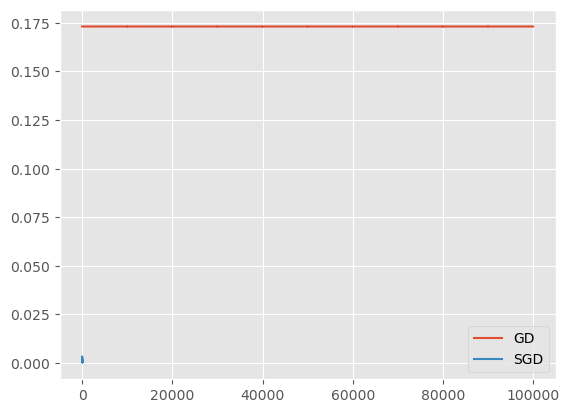

In [ ]:
plt.plot(cost_gd_ols, label= "GD")
plt.plot(cost_ols,label="SGD")
plt.legend()